In [ ]:
# Importing packages
import time
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package

## Setup matplotlib to output figures into the notebook
## - To make the figures interactive (zoomable, tooltip, etc.) use ""%matplotlib notebook" instead
%matplotlib notebook

plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] =120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

from IPython.core.display import display, HTML, Latex

In [ ]:
x = np.array([[1, 2], [3, 2], [-2, 2], [0, -1], [0, -5]])
y = np.array([1, 1, 2, 3, 3]) - 1
display(x)
display(y)

array([[ 1,  2],
       [ 3,  2],
       [-2,  2],
       [ 0, -1],
       [ 0, -5]])

array([0, 0, 1, 2, 2])

In [ ]:
py = np.array([np.mean(y==i) for i in range(3)])
display(py)

array([0.4, 0.2, 0.4])

In [ ]:
mu = np.stack([np.mean(x[y==i], axis=0) for i in range(3)])
display(mu)

array([[ 2.,  2.],
       [-2.,  2.],
       [ 0., -3.]])

In [ ]:
x_tilde = x - mu[y]
display(x_tilde)

sigma = x_tilde.T @ x_tilde / len(x)
display(sigma)

sigma_inv = np.linalg.inv(sigma)
display(sigma_inv)

array([[-1.,  0.],
       [ 1.,  0.],
       [ 0.,  0.],
       [ 0.,  2.],
       [ 0., -2.]])

array([[0.4, 0. ],
       [0. , 1.6]])

array([[2.5  , 0.   ],
       [0.   , 0.625]])

In [ ]:
a12 = sigma_inv @ (mu[0]-mu[1])
a13 = sigma_inv @ (mu[0]-mu[2])
a23 = sigma_inv @ (mu[1]-mu[2])

display(a12)
display(a13)
display(a23)

b12 = 0.5 * (mu[1] @ sigma_inv @ mu[1] - mu[0] @ sigma_inv @ mu[0]) + np.log(py[0] / py[1])
b13 = 0.5 * (mu[2] @ sigma_inv @ mu[2] - mu[0] @ sigma_inv @ mu[0]) + np.log(py[0] / py[2])
b23 = 0.5 * (mu[2] @ sigma_inv @ mu[2] - mu[1] @ sigma_inv @ mu[1]) + np.log(py[1] / py[2])

display(b12 - np.log(py[0] / py[1]))
display(b13 - np.log(py[0] / py[2]))
display(b23 - np.log(py[1] / py[2]))

array([10.,  0.])

array([5.   , 3.125])

array([-5.   ,  3.125])

0.0

-3.4375

-3.4375

<IPython.core.display.Javascript object>


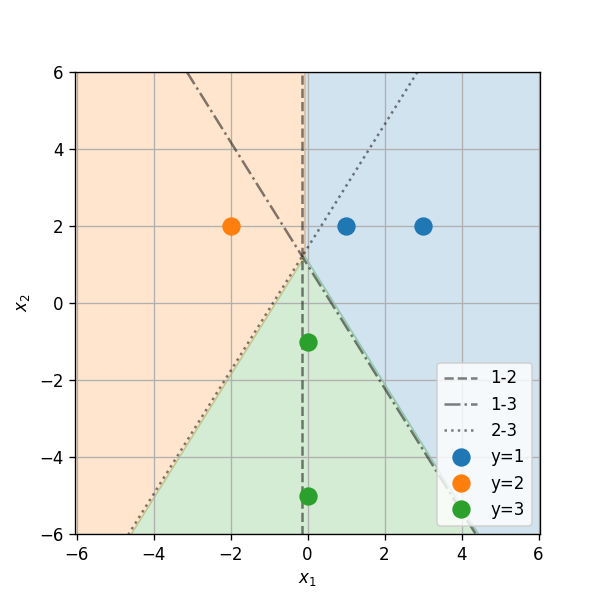

In [ ]:
## Prepare figure and plotting counters
colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:3]

fig, ax = plt.subplots(figsize=(5, 5))

tmp_mat = np.array([[0, 1], [-1, 0]])

a12_unit = a12 / np.linalg.norm(a12)
a13_unit = a13 / np.linalg.norm(a13)
a23_unit = a23 / np.linalg.norm(a23)

a12_perp = tmp_mat @ a12_unit
a13_perp = tmp_mat @ a13_unit
a23_perp = tmp_mat @ a23_unit

a12_center = -(a12_unit * b12 / np.linalg.norm(a12))
a13_center = -(a13_unit * b13 / np.linalg.norm(a13))
a23_center = -(a23_unit * b23 / np.linalg.norm(a23))

a12_left = a12_center + a12_perp * 100
a13_left = a13_center + a13_perp * 100
a23_left = a23_center + a23_perp * 100

a12_right = a12_center - a12_perp * 100
a13_right = a13_center - a13_perp * 100
a23_right = a23_center - a23_perp * 100

center = -np.linalg.inv(np.stack((a12, a13))) @ np.array((b12, b13))

l12 = a12_center[None, :] + np.stack((a12_left, a12_right))
l13 = a12_center[None, :] + np.stack((a13_left, a13_right))
l23 = a12_center[None, :] + np.stack((a23_left, a23_right))

plt.plot(l12[:, 0], l12[:, 1], '--k', label='1-2', alpha=0.5)
plt.plot(l13[:, 0], l13[:, 1], '-.k', label='1-3', alpha=0.5)
plt.plot(l23[:, 0], l23[:, 1], ':k', label='2-3', alpha=0.5)

plt.plot(x[y==0, 0], x[y==0, 1], 'o', ms=10, color=colors[0], label='y=1')
plt.plot(x[y==1, 0], x[y==1, 1], 'o', ms=10, color=colors[1], label='y=2')
plt.plot(x[y==2, 0], x[y==2, 1], 'o', ms=10, color=colors[2], label='y=3')

ax.axis('equal')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend(loc='lower right')

ax.add_patch(plt.Polygon(np.stack((a12_right, center, a13_left)), color=colors[0], alpha=0.2))
ax.add_patch(plt.Polygon(np.stack((a12_right, center, a23_right)), color=colors[1], alpha=0.2))
ax.add_patch(plt.Polygon(np.stack((a13_left, center, a23_right)), color=colors[2], alpha=0.2))

fig.savefig('../media/elephants_classification.png')